<h3 color="green">Conclusion: doctr is promising</h3>

In [ ]:
!pip install python-doctr[torch]

In [2]:
from pathlib import Path

from dataset.datasets_schema import Datasets

datasets_path = Path("../dataset/datasets.yaml")
datasets: Datasets = Datasets.from_yaml(datasets_path)
moodle_dataset = datasets["moodle"]
entries = moodle_dataset.document_storage.entries
print(len(entries))

821


In [3]:
pdf = next(entry for entry in entries.values() if entry.path and entry.path.exists() and entry.path.suffix == ".pdf")

In [ ]:
import os

os.environ["USE_TORCH"] = "1"

In [24]:
from doctr.io import DocumentFile
from doctr.models import detection_predictor

doc = DocumentFile.from_pdf(pdf.path)
recognizer = detection_predictor(pretrained=True)
results, maps = recognizer(doc, return_maps=True)

In [47]:
%matplotlib inline


def show_page(page, page_result):
    """
    :param page: Page image as numpy array
    :param page_result: {'words': array([[0.24511719, 0.37695312, 0.54785156, 0.515625  , 0.47289205],
          [0.53710938, 0.38671875, 0.74902344, 0.48535156, 0.59858942]])}
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots()
    # remove the axis
    ax.axis("off")
    ax.imshow(page, cmap="gray")
    for word in page_result["words"]:
        x0, y0, x1, y1, _ = word
        # need to rescale the coordinates
        x0 *= page.shape[1]
        x1 *= page.shape[1]
        y0 *= page.shape[0]
        y1 *= page.shape[0]
        rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
    plt.show()

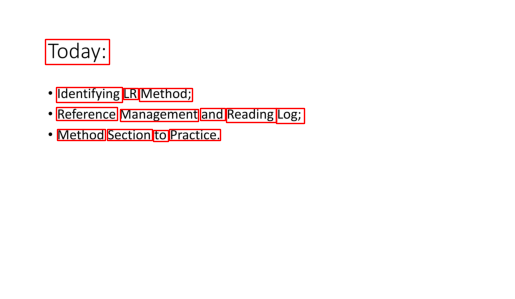

In [49]:
page, result = doc[1], results[1]
show_page(page, result)